In [25]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv(r"C:\Users\4019-tjyen\Downloads\dasnet_results_12122024.csv")

In [27]:
#sys.path.append(r"C:\Users\4019-tjyen\Desktop\plotlib\Visualization\yunchieh_plotlib")
print(sys.path)

['c:\\Users\\4019-tjyen\\Desktop\\Lab_result', 'c:\\Users\\4019-tjyen\\anaconda\\python312.zip', 'c:\\Users\\4019-tjyen\\anaconda\\DLLs', 'c:\\Users\\4019-tjyen\\anaconda\\Lib', 'c:\\Users\\4019-tjyen\\anaconda', '', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\win32', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib']


In [28]:
# Import module 
from Plot_function import plot_boxplot

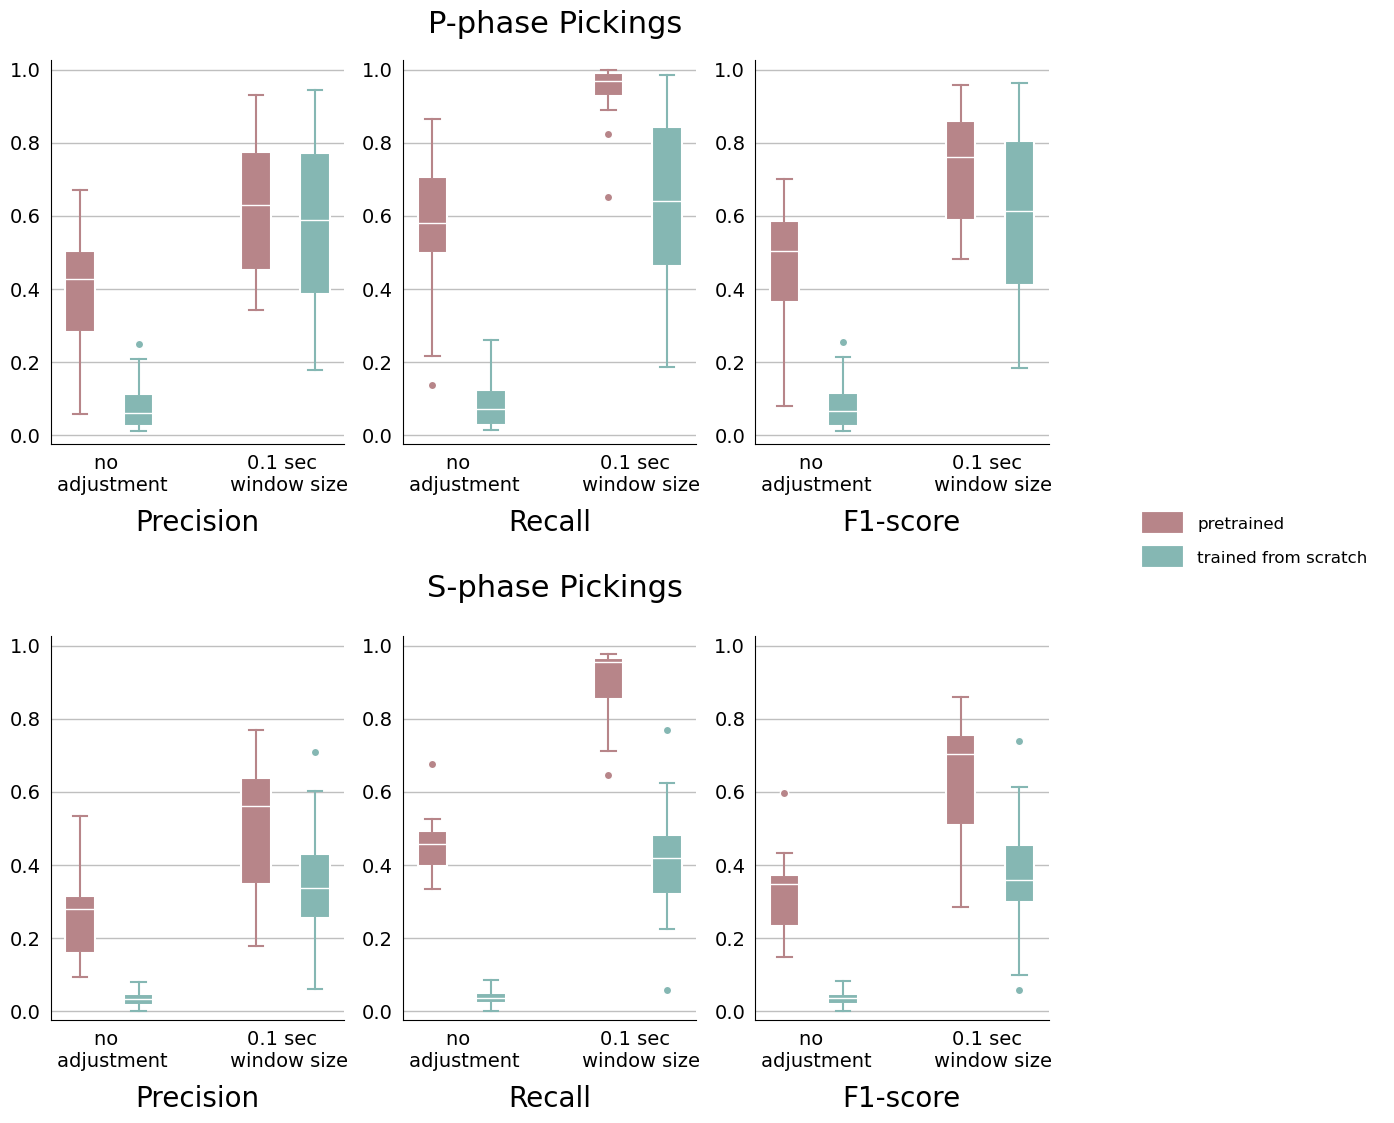

In [31]:
# Plot setting
save_file_name = "inference_results_17122024_v2.png"
colors = [("#B78589", 1.0), ("#85B7B3", 1.0)]

eval_labels = ["Precision", "Recall", "F1-score"]
model_list = ["pretrained", "scratch"]
eval_list = ["precision", "recall", "f1score"]
task_list = ["pphase", "sphase"]
window_list = ["w0", "w1"]

tick_fontsize = 14
axis_fontsize = 20
title_fontsize = 22

x_labels = ["no \n adjustment", "0.1 sec \n window size"]
positions = [1, 2, 4, 5]
x_ticks = [1.5, 4.5]
y_ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

kwargs = dict()
kwargs["set_xticks"] = dict(ticks=x_ticks, labels=x_labels, fontsize=tick_fontsize)
kwargs["set_ylim"] = dict(bottom=-0.025, top=1.025)
kwargs["set_yticks"] = dict(ticks=y_ticks, labels=y_ticks, fontsize=tick_fontsize)
kwargs["grid"] = dict(axis="y", which="major", linestyle="-", color="grey", linewidth=1, alpha=0.5)
kwargs["tick_params"] = dict(axis="both", which="major", left=False, bottom = False)

box_props = dict()
box_props["boxes"] = [dict(facecolor=colors[0], edgecolor="white", linewidth=1.5), dict(facecolor = colors[1], edgecolor="white", linewidth = 1.5)] * 2
box_props["medians"] = [dict(color="white", linewidth=1.0)] * 4
box_props["whiskers"] = [dict(color=colors[0], linewidth=1.5), dict(color=colors[0], linewidth=1.5), dict(color=colors[1], linewidth=1.5), dict(color=colors[1], linewidth=1.5)] * 2
box_props["caps"] = [dict(color=colors[0], linewidth=1.5), dict(color=colors[0], linewidth=1.5), dict(color=colors[1], linewidth=1.5), dict(color=colors[1], linewidth=1.5)] * 2
box_props["fliers"] = [dict(marker="o", markerfacecolor=colors[0], markeredgecolor="white", alpha=1.0), dict(marker="o", markerfacecolor=colors[1], markeredgecolor="white", alpha=1.0)] * 2


# Legend setting
legend_labels = ["pretrained", "trained from scratch"]

handles = [plt.Line2D([], [], color=color, lw=15) for color in colors]

legend_loc = "center right"
bbox_to_anchor=(0.85, 0.5)
legend_fontsize = 12

legend_kwarg = dict(labelspacing=1.0,
                    handlelength=1.2,
                    handleheight=1.2,
                    handletextpad=1.5,
                    borderpad=1.0,
                    borderaxespad=1.0)


# Plot results
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 4, hspace=0.5, wspace=0.2)

for i in range(2):
    for j in range(3):

        ax = fig.add_subplot(gs[i, j])

        col_names = [model_list[0]+'_'+eval_list[j]+'_'+task_list[i]+'_'+window_list[0],
                     model_list[1]+'_'+eval_list[j]+'_'+task_list[i]+'_'+window_list[0],
                     model_list[0]+'_'+eval_list[j]+'_'+task_list[i]+'_'+window_list[1],
                     model_list[1]+'_'+eval_list[j]+'_'+task_list[i]+'_'+window_list[1]]

        kwargs["set_xlabel"] = dict(xlabel=eval_labels[j], labelpad=10.0, fontsize=axis_fontsize)
        
        plot_boxplot(ax=ax,
                     data=data[col_names],
                     positions=positions,
                     box_props=box_props,
                     **kwargs
                    )

fig.legend(handles=handles,
           labels=legend_labels,
           fontsize=legend_fontsize,
           loc=legend_loc,
           bbox_to_anchor=bbox_to_anchor,
           edgecolor="white",
           **legend_kwarg
           )

# Title
fig.text(0.38, 0.93, "P-phase Pickings", ha="center", va="center", fontsize=title_fontsize)
fig.text(0.38, 0.46, "S-phase Pickings", ha="center", va="center", fontsize=title_fontsize)

plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)
plt.savefig(save_file_name, format="png", dpi="figure")
plt.show()